<a href="https://colab.research.google.com/github/shreyaa0008/BCSE331L-EDA-22BDS0271/blob/main/22BDS0271_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BCSE331L – Exploratory Data Analysis (EDA)
**Name:** Shreya Singh
**Registration no.** : 22BDS0271  
**Dataset:** PhD Publications – https://raw.githubusercontent.com/salemprakash/EDA/main/Data/PhDPublications.csv  


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Load dataset
DATA_URL = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/PhDPublications.csv"
df = pd.read_csv(DATA_URL)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  915 non-null    int64  
 1   articles  915 non-null    int64  
 2   gender    915 non-null    object 
 3   married   915 non-null    object 
 4   kids      915 non-null    int64  
 5   prestige  915 non-null    float64
 6   mentor    915 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 50.2+ KB


In [22]:
# Dimensions
print("Shape:", df.shape)
df.describe(include='all')
df.info()


Shape: (915, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  915 non-null    int64  
 1   articles  915 non-null    int64  
 2   gender    915 non-null    object 
 3   married   915 non-null    object 
 4   kids      915 non-null    int64  
 5   prestige  915 non-null    float64
 6   mentor    915 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 50.2+ KB


In [5]:
# Summary statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rownames,915.0,NaN,NaN,NaN,458.0,264.282046,1.0,229.5,458.0,686.5,915.0
articles,915.0,NaN,NaN,NaN,1.692896,1.926069,0.0,0.0,1.0,2.0,19.0
gender,915,2,male,494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
married,915,2,yes,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kids,915.0,NaN,NaN,NaN,0.495082,0.76488,0.0,0.0,0.0,1.0,3.0
prestige,915.0,NaN,NaN,NaN,3.103109,0.984249,0.755,2.26,3.15,3.92,4.62
mentor,915.0,NaN,NaN,NaN,8.767213,9.483916,0.0,3.0,6.0,12.0,77.0


In [6]:
# Data Cleaning example
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df.drop_duplicates()
df.isna().sum()

,0
rownames,0
articles,0
gender,0
married,0
kids,0
prestige,0
mentor,0


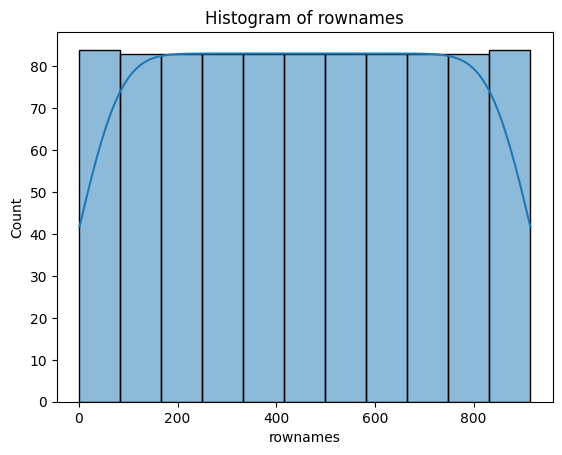

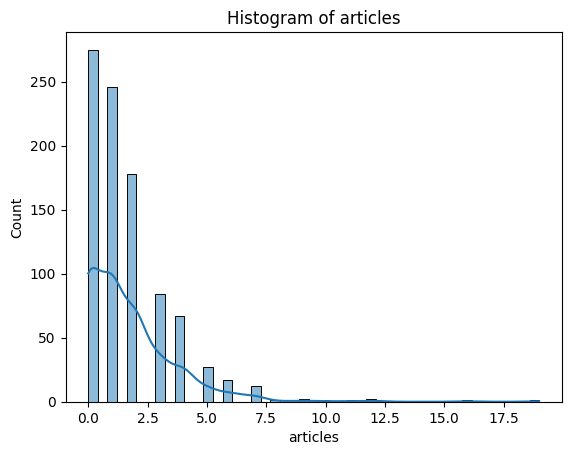

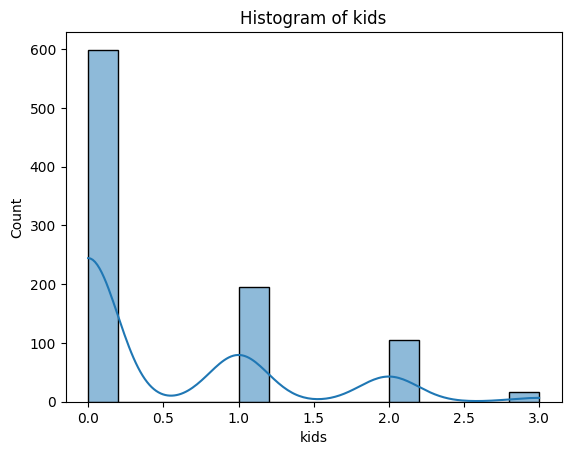

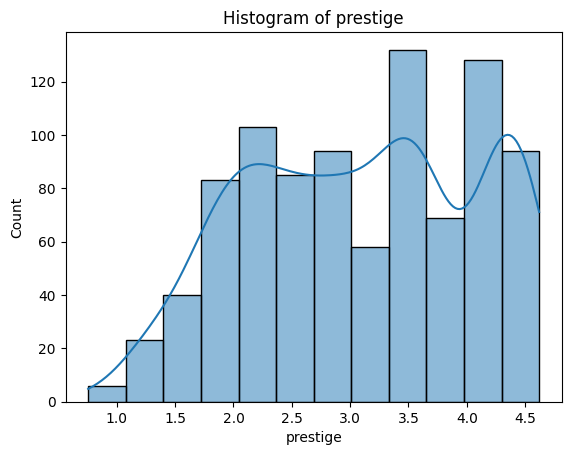

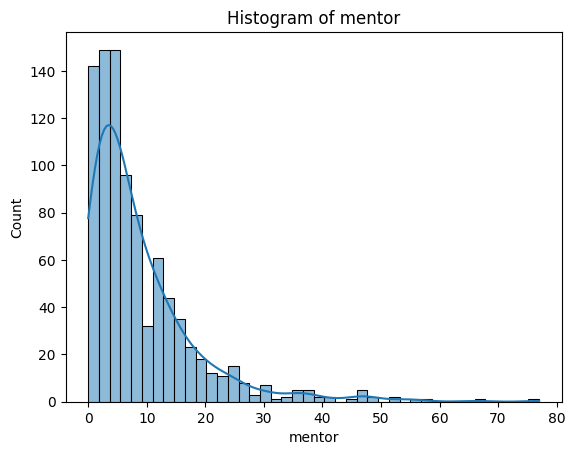

In [7]:
# Univariate Analysis
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

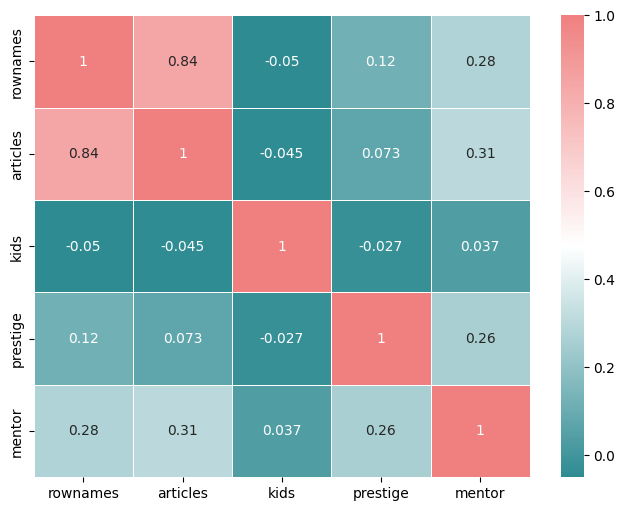

In [12]:
# Bivariate Analysis (Correlation heatmap)
new_cmap = LinearSegmentedColormap.from_list(
    "new_cmap",
    ["#2E8B92", "#FFFFFF", "#F08080"]
)

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=new_cmap, linewidths=0.5)
plt.show()

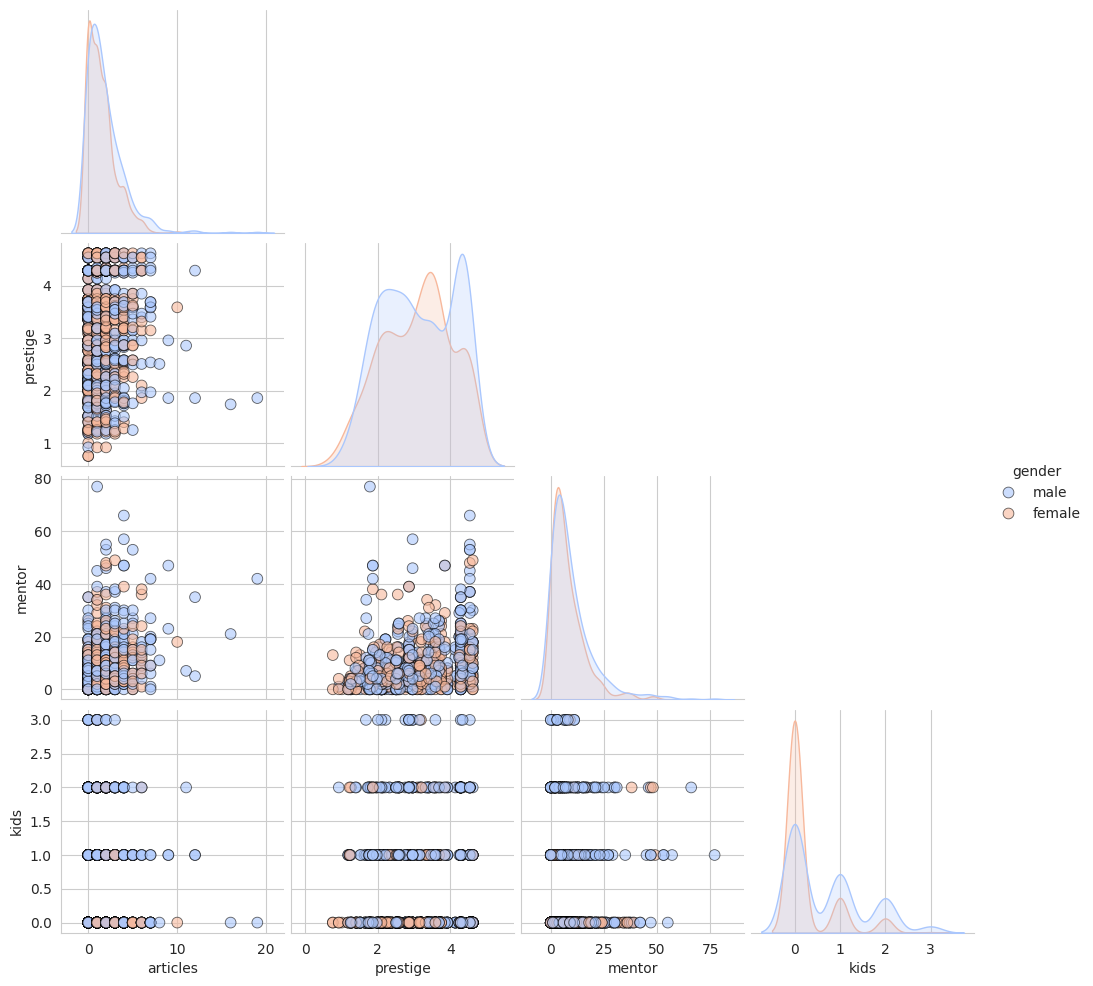

In [20]:
#Multivariate analysis - Pair Plot
sns.set_style("whitegrid")
sns.pairplot(
    df[['articles', 'prestige', 'mentor', 'kids', 'gender']],
    diag_kind="kde",
    corner=True,
    hue="gender",           # color by category
    palette="coolwarm",
    plot_kws={
        "alpha": 0.6,
        "s": 60,
        "edgecolor": "k"
    }
)
plt.show()

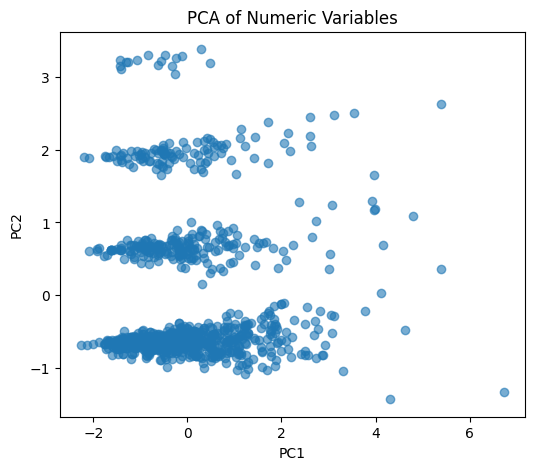

In [10]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df[['articles','prestige','mentor','kids']])
pca_res = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(6,5))
plt.scatter(pca_res[:,0], pca_res[:,1], alpha=0.6)
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('PCA of Numeric Variables')
plt.show()